In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading both the csv Files
Trump_reviews = pd.read_csv('/content/drive/MyDrive/Data sets/Trumpall2.csv')
Biden_reviews = pd.read_csv('/content/drive/MyDrive/Data sets/Bidenall2.csv')

In [ ]:
#Visualizing Dataframes
Trump_reviews.head()
Biden_reviews.head()

,user,text
0,MarkHodder3,@JoeBiden And we’ll find out who won in 2026...
1,K87327961G,@JoeBiden Your Democratic Nazi Party cannot be...
2,OldlaceA,@JoeBiden So did Lying Barr
3,penblogger,@JoeBiden It's clear you didnt compose this tw...
4,Aquarian0264,@JoeBiden I will vote in person thank you.


In [ ]:
#Visualizing text
Trump_reviews['text'][10]
Biden_reviews['text'][500]

'@JoeBiden ... and maybe some kind of healthcare that covers everybody... not that the thought of millions in hospit… https://t.co/v3QKITvlPJ'

In [ ]:
# Finding sentiments using TextBlob
text_blob_object1 = TextBlob(Trump_reviews['text'][10])
print(text_blob_object1.sentiment)
text_blob_object2 = TextBlob(Biden_reviews['text'][500])
print(text_blob_object2.sentiment)

Sentiment(polarity=0.15, subjectivity=0.3125)
Sentiment(polarity=0.6, subjectivity=0.9)


In [ ]:
# Sentence  with zero polarity and subjectivity
text_blob_object2 = TextBlob(Biden_reviews['text'][100])
print(text_blob_object2.sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)


In [ ]:
# Finding Sentiment Polarity for each datasets
# Donald Trump
def find_pol(review):
    return TextBlob(review).sentiment.polarity
Trump_reviews['Sentiment_Polarity'] = Trump_reviews['text'].apply(find_pol)
Trump_reviews.tail()


,user,text,Sentiment_Polarity
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",0.000
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,0.000
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.225
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,0.000
2787,bjklinz,"@realDonaldTrump I’m sorry, Donald. No. #POTUS",-0.500


In [ ]:
# Joe Biden
def find_pol(review):
    return TextBlob(review).sentiment.polarity

Biden_reviews['Sentiment_Polarity'] = Biden_reviews['text'].apply(find_pol)
Biden_reviews.tail()

,user,text,Sentiment_Polarity
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,0.15
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,0.00
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,0.00
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,0.10
2539,rerickre,"@JoeBiden ... and I know, because it’s much co...",0.20


In [ ]:
# Adding one more attribute for Expression Label
# Donald Trump
Trump_reviews['Expression Label'] = np.where(Trump_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Trump_reviews['Expression Label'][Trump_reviews.Sentiment_Polarity ==0] = "Neutral"
Trump_reviews.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,user,text,Sentiment_Polarity,Expression Label
2783,4diva63,"@realDonaldTrump For the 1/100 time, absentee ...",0.000,Neutral
2784,hidge826,@realDonaldTrump If you’re so scared of losing...,0.000,Neutral
2785,SpencerRossy,@realDonaldTrump I rarely get involved with fo...,0.225,positive
2786,ScoobyMcpherson,@realDonaldTrump This is the moment when Trump...,0.000,Neutral
2787,bjklinz,"@realDonaldTrump I’m sorry, Donald. No. #POTUS",-0.500,negative


In [ ]:
# Joe Biden
Biden_reviews['Expression Label'] = np.where(Biden_reviews['Sentiment_Polarity']>0,'positive', 'negative')
Biden_reviews['Expression Label'][Biden_reviews.Sentiment_Polarity ==0] = "Neutral"
Biden_reviews.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user,text,Sentiment_Polarity,Expression Label
2535,meryn1977,@JoeBiden You'll just try to calm those waters...,0.15,positive
2536,BSNelson114,@JoeBiden 96 days 96 dias #VoteJoeBiden2020 #...,0.00,Neutral
2537,KenCapel,@JoeBiden YOU THINK YOU CAN DO THAT??? YOU CAN...,0.00,Neutral
2538,LeslyeHale,@JoeBiden Trump wants our children back at sch...,0.10,positive
2539,rerickre,"@JoeBiden ... and I know, because it’s much co...",0.20,positive


In [ ]:
# Analyzing Positive, Negative and Neutral replies on Trump's tweets.     
new1 = Trump_reviews.groupby('Expression Label').count()
x = list(new1['Sentiment_Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))
df = pd.DataFrame(tuple_list, columns=['x','y'])
df['color'] = 'blue'
df['color'][1] = 'red'
df['color'][2] = 'green'
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.update_layout(title_text='Trump\'s Reviews Analysis' )
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
# Analyzing Positive, Negative and Neutral replies on Biden's tweets
new2 = Biden_reviews.groupby('Expression Label').count()
x = list(new2['Sentiment_Polarity'])
y = list(new2.index)
tuple_list = list(zip(x,y))
df = pd.DataFrame(tuple_list, columns=['x','y'])
df['color'] = 'blue'
df['color'][1] = 'red'
df['color'][2] = 'green'
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.update_layout(title_text='Biden\'s Reviews Analysis' )
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Dropping all the statements having zero polarity

# Donald Trump      
reviews1 = Trump_reviews[Trump_reviews['Sentiment_Polarity'] == 0.0000]
reviews1.shape
cond1 = Trump_reviews['Sentiment_Polarity'].isin(reviews1['Sentiment_Polarity'])
Trump_reviews.drop(Trump_reviews[cond1].index, inplace = True)
Trump_reviews.shape

(1324, 4)

In [ ]:
# Joe Biden      
reviews2 = Biden_reviews[Biden_reviews['Sentiment_Polarity'] == 0.0000]
reviews2.shape
cond2 = Biden_reviews['Sentiment_Polarity'].isin(reviews1['Sentiment_Polarity'])
Biden_reviews.drop(Biden_reviews[cond2].index, inplace = True)
Biden_reviews.shape

(1031, 4)

In [ ]:
# Let's make both the datasets balanced now. So we will just take 1000 rows from both datasets and drop rest of them.

# Donald Trump      
np.random.seed(10)
remove_n =324
drop_indices = np.random.choice(Trump_reviews.index, remove_n, replace=False)
df_subset_trump = Trump_reviews.drop(drop_indices)
df_subset_trump.shape

(1000, 4)

In [ ]:
# Joe biden            
np.random.seed(10)
remove_n =31
drop_indices = np.random.choice(Biden_reviews.index, remove_n, replace=False)
df_subset_biden = Biden_reviews.drop(drop_indices)
df_subset_biden.shape

(1000, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



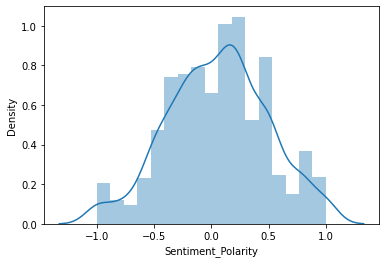

In [ ]:
# Data Visualiization

# Donald Trump      
sns.distplot(df_subset_trump['Sentiment_Polarity'])
# sns.boxplot([df_subset_trump.Sentiment_Polarity])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



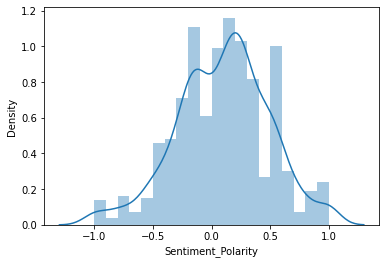

In [ ]:
# Joe Biden      
sns.distplot(df_subset_biden['Sentiment_Polarity'])
# sns.boxplot([df_subset_biden.Sentiment_Polarity])
plt.show()

In [ ]:
# Percentage count for Donald Trump
count_1 = df_subset_trump.groupby('Expression Label').count()
print(count_1)
negative_per1 = (count_1['Sentiment_Polarity'][0]/1000)*100
positive_per1 = (count_1['Sentiment_Polarity'][1]/1000)*100

                  user  text  Sentiment_Polarity
Expression Label                                
negative           449   449                 449
positive           551   551                 551


In [ ]:
# Percentage count for Joe Biden      
count_2 = df_subset_biden.groupby('Expression Label').count()
print(count_2)
negative_per2 = (count_2['Sentiment_Polarity'][0]/1000)*100
positive_per2 = (count_2['Sentiment_Polarity'][1]/1000)*100

                  user  text  Sentiment_Polarity
Expression Label                                
negative           393   393                 393
positive           607   607                 607


In [ ]:
# Analysis of Positive and Negative comments on both the handle

Politicians = ['Donald Trump', 'Joe Biden']
lis_pos = [positive_per1, positive_per2]
lis_neg = [negative_per1, negative_per2]

fig = go.Figure(data=[
    go.Bar(name='Positive', x=Politicians, y=lis_pos),
    go.Bar(name='Negative', x=Politicians, y=lis_neg)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
# Most Positive and Most Negative comments on both the Twitter handles

# Donald Trump
# Most positive replies      
most_positive1 = df_subset_trump[df_subset_trump.Sentiment_Polarity == 1].text.head()
pos_txt1 = list(most_positive1)
pos1 = df_subset_trump[df_subset_trump.Sentiment_Polarity == 1].Sentiment_Polarity.head()
pos_pol1 = list(pos1)
fig = go.Figure(data=[go.Table(columnorder = [1,2], 
                               columnwidth = [50,200],
                               header=dict(values=['Polarity','Most Positive Replies on Trump\'s Handle'],
                               fill_color='paleturquoise',
                               align='left'),
               cells=dict(values=[pos_pol1, pos_txt1],
                               fill_color='lavender',
                               align='left'))])
 
fig.show()

In [ ]:
# Most Negative Replies      
most_negative1 = df_subset_trump[df_subset_trump.Sentiment_Polarity == -1].text.head()
neg_txt1 = list(most_negative1)
neg1 = df_subset_trump[df_subset_trump.Sentiment_Polarity == -1].Sentiment_Polarity.head()
neg_pol1 = list(neg1)
fig = go.Figure(data=[go.Table(columnorder = [1,2],
                               columnwidth = [50,400],
                               header=dict(values=['Polarity','Most Negative Replies on Trump\'s handle'],
                               fill_color='paleturquoise',
                               align='left'),
                cells=dict(values=[neg_pol1, neg_txt1],
                           fill_color='lavender',
                           align='left'))])

fig.show()

In [ ]:
# Joe Biden
# Most Positive replies      
most_positive2 = df_subset_biden[df_subset_biden.Sentiment_Polarity == 1].text.tail()
pos_txt2 = list(most_positive2)
pos2 = df_subset_biden[df_subset_biden.Sentiment_Polarity == 1].Sentiment_Polarity.tail()
pos_pol2 = list(pos2)
fig = go.Figure(data=[go.Table(columnorder = [1,2],
                               columnwidth = [50,400],
                               header=dict(values=['Polarity','Most Positive Replies on Biden\'s handle'],
                               fill_color='paleturquoise',
                               align='left'),
                cells=dict(values=[pos_pol2, pos_txt2],
                           fill_color='lavender',
                           align='left'))])

fig.show()

In [ ]:
# Most negative replies
most_negative2 = df_subset_biden[df_subset_biden.Sentiment_Polarity == -1].text.head()
neg_txt2 = list(most_negative2)
neg2 = df_subset_biden[df_subset_biden.Sentiment_Polarity == -1].Sentiment_Polarity.head()
neg_pol2 = list(neg2)
fig = go.Figure(data=[go.Table(columnorder = [1,2],
                               columnwidth = [50,400],
                               header=dict(values=['Polarity','Most Negative Replies on Biden\'s handle'],
                               fill_color='paleturquoise',
                               align='left'),
                cells=dict(values=[neg_pol2, neg_txt2],
                           fill_color='lavender',
                           align='left'))])

fig.show()

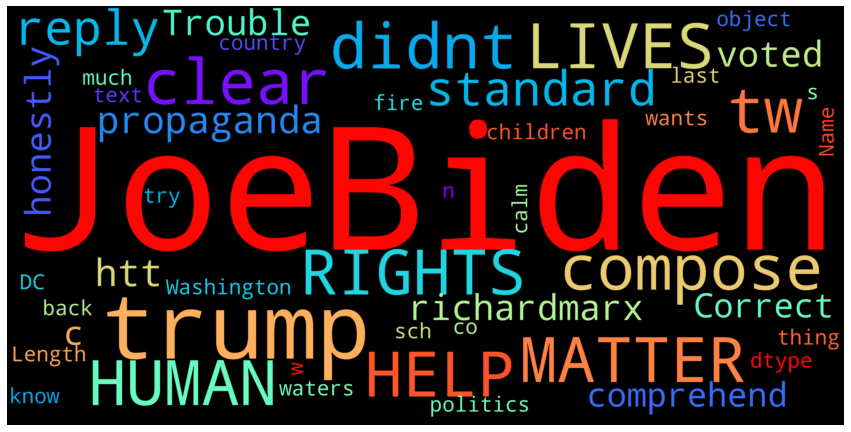

In [ ]:
# WordCloud for Donald Trump      
# Start with one review:
text = str(df_subset_biden.text)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500, scale=10, relative_scaling=.6, background_color="black", colormap = "rainbow").generate(text)
# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

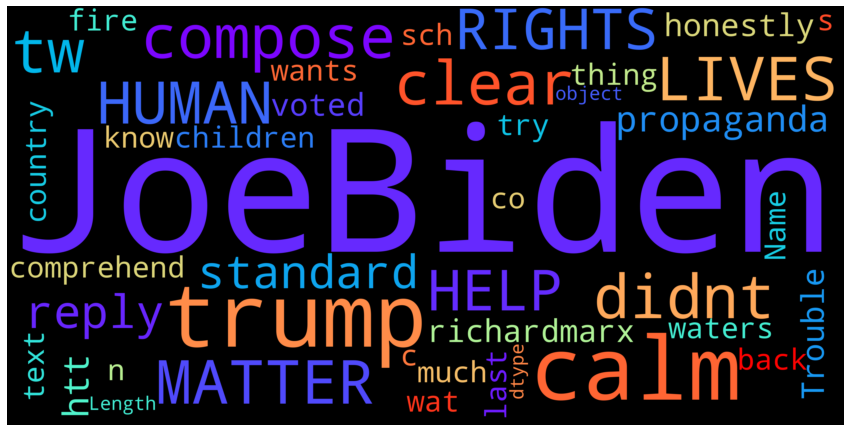

In [ ]:
# WordCloud for Joe Biden      
# Start with one review:
text = str(Biden_reviews.text)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=100, max_words=500,scale=10,relative_scaling=.6,background_color="black", colormap = "rainbow").generate(text)
# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

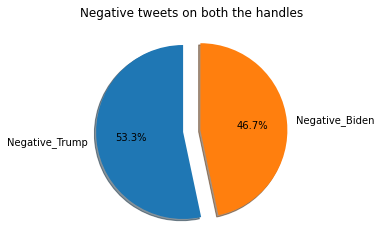

In [ ]:
# Comparison between negative comments on both      
labels =  ['Negative_Trump', 'Negative_Biden'] 
sizes = lis_neg
explode = (0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Negative tweets on both the handles')
plt.show()

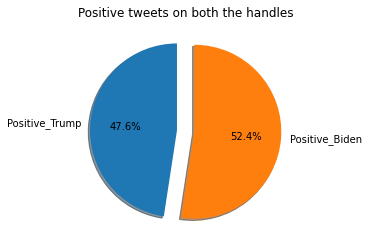

In [ ]:
# Comparison between Positive comments on both      
labels =  ['Positive_Trump', 'Positive_Biden'] 
sizes = lis_pos
explode = (0.1, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle=90)
ax1.set_title('Positive tweets on both the handles')
plt.show()

In [ ]:
#ACCORDING TO ABOVE RESULT CANDIDATE WHO HAS MORE PERCENTAGE OF POSITIVE TWEETS AND LESS PERCENTAGE NEGATIVE TWEETS WILL WIN THE ELECTION ACCORDING TO MODEL